In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from IPython.display import VimeoVideo
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA

In [3]:
df=pd.read_csv("BTC-INR.csv")

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-21,1396942.000,1397956.125,1388138.500,1393817.875,1393817.875,1233481340162
1,2022-12-22,1393888.000,1395520.000,1377057.625,1394817.000,1394817.000,1362597734113
2,2022-12-23,1394759.125,1400530.250,1391846.625,1387501.375,1387501.375,1266263988861
3,2022-12-24,1387503.375,1393097.875,1387218.500,1391697.875,1391697.875,804949340386
4,2022-12-25,1391677.250,1392755.125,1384056.750,1392458.125,1392458.125,963723627772
...,...,...,...,...,...,...,...
361,2023-12-17,3482587.500,3542976.000,3464764.500,3507697.750,3507697.750,1194700640600
362,2023-12-18,3507364.500,3517611.000,3427515.500,3434999.500,3434999.500,1385030792748
363,2023-12-19,3433632.250,3553216.000,3366190.000,3543232.500,3543232.500,2096887611657
364,2023-12-20,3544726.500,3604376.500,3475015.750,3512167.000,3512167.000,1925228609272


# Data Understanding

In [5]:
df.shape

(366, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02,3.660000e+02
mean,2.311335e+06,2.349220e+06,2.279962e+06,2.316767e+06,2.316767e+06,1.490194e+12
std,4.784350e+05,4.886451e+05,4.698631e+05,4.804021e+05,4.804021e+05,7.019874e+11
min,1.369664e+06,1.376154e+06,1.356638e+06,1.369630e+06,1.369630e+06,4.434339e+11
25%,2.125154e+06,2.151140e+06,2.072044e+06,2.131268e+06,2.131268e+06,9.951860e+11
50%,2.264114e+06,2.305964e+06,2.229954e+06,2.264076e+06,2.264076e+06,1.298566e+12
75%,2.467608e+06,2.499287e+06,2.437147e+06,2.470941e+06,2.470941e+06,1.868670e+12
max,3.685955e+06,3.730648e+06,3.639866e+06,3.684835e+06,3.684835e+06,4.495685e+12


In [8]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-21,1396942.000,1397956.125,1388138.500,1393817.875,1393817.875,1233481340162
1,2022-12-22,1393888.000,1395520.000,1377057.625,1394817.000,1394817.000,1362597734113
2,2022-12-23,1394759.125,1400530.250,1391846.625,1387501.375,1387501.375,1266263988861
3,2022-12-24,1387503.375,1393097.875,1387218.500,1391697.875,1391697.875,804949340386
4,2022-12-25,1391677.250,1392755.125,1384056.750,1392458.125,1392458.125,963723627772


In [9]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
361,2023-12-17,3482587.50,3542976.0,3464764.50,3507697.75,3507697.75,1194700640600
362,2023-12-18,3507364.50,3517611.0,3427515.50,3434999.50,3434999.50,1385030792748
363,2023-12-19,3433632.25,3553216.0,3366190.00,3543232.50,3543232.50,2096887611657
364,2023-12-20,3544726.50,3604376.5,3475015.75,3512167.00,3512167.00,1925228609272
365,2023-12-21,3634468.00,3680624.0,3604612.00,3613996.25,3613996.25,2053740298240


In [10]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-21,1396942.000,1397956.125,1388138.500,1393817.875,1393817.875,1233481340162
1,2022-12-22,1393888.000,1395520.000,1377057.625,1394817.000,1394817.000,1362597734113
2,2022-12-23,1394759.125,1400530.250,1391846.625,1387501.375,1387501.375,1266263988861
3,2022-12-24,1387503.375,1393097.875,1387218.500,1391697.875,1391697.875,804949340386
4,2022-12-25,1391677.250,1392755.125,1384056.750,1392458.125,1392458.125,963723627772
5,2022-12-26,1392479.750,1402731.750,1390870.500,1402705.375,1402705.375,985466364712
6,2022-12-27,1402662.750,1406026.250,1378261.750,1383756.750,1383756.750,1303581799925
7,2022-12-28,1383692.625,1388475.250,1366746.750,1371422.000,1371422.000,1408965912561
8,2022-12-29,1371401.250,1379199.500,1367794.625,1378579.375,1378579.375,1198817299816
9,2022-12-30,1378495.500,1378655.750,1356638.000,1373863.750,1373863.750,1318138039617


In [11]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

# Data Preprocessing

In [12]:
df.isna()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
361,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False
364,False,False,False,False,False,False,False


In [13]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: >

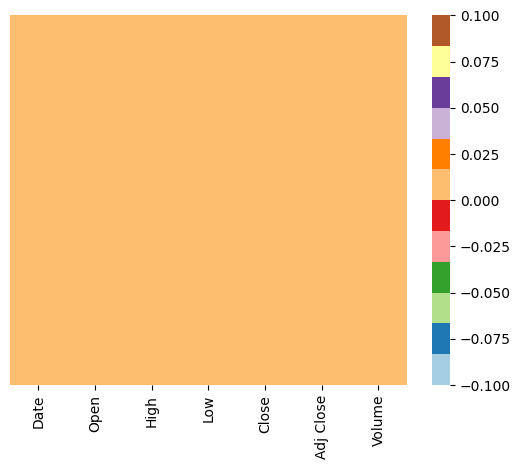

In [14]:
sns.heatmap(df.isna(),yticklabels=False,cmap='Paired')

In [15]:
np.array(df)

array([['2022-12-21', 1396942.0, 1397956.125, ..., 1393817.875,
        1393817.875, 1233481340162],
       ['2022-12-22', 1393888.0, 1395520.0, ..., 1394817.0, 1394817.0,
        1362597734113],
       ['2022-12-23', 1394759.125, 1400530.25, ..., 1387501.375,
        1387501.375, 1266263988861],
       ...,
       ['2023-12-19', 3433632.25, 3553216.0, ..., 3543232.5, 3543232.5,
        2096887611657],
       ['2023-12-20', 3544726.5, 3604376.5, ..., 3512167.0, 3512167.0,
        1925228609272],
       ['2023-12-21', 3634468.0, 3680624.0, ..., 3613996.25, 3613996.25,
        2053740298240]], dtype=object)

In [16]:
df.ndim

2

In [17]:
np.mean(df)

Open         2.311335e+06
High         2.349220e+06
Low          2.279962e+06
Close        2.316767e+06
Adj Close    2.316767e+06
Volume       1.490194e+12
dtype: float64

In [18]:
np.std(df)

Open         4.777810e+05
High         4.879771e+05
Low          4.692208e+05
Close        4.797454e+05
Adj Close    4.797454e+05
Volume       7.010277e+11
dtype: float64

In [19]:
np.var(df)

Open         2.282747e+11
High         2.381216e+11
Low          2.201681e+11
Close        2.301556e+11
Adj Close    2.301556e+11
Volume       4.914399e+23
dtype: float64

In [20]:
np.percentile(df['High'],25)

2151139.5

In [21]:
np.percentile(df['Open'],50)

2264113.5

In [22]:
np.percentile(df['Close'],75)

2470940.875

In [23]:
np.percentile(df['Close'],0.25)

1371265.1671875

In [24]:
np.quantile(df['Close'],0.50)

2264076.0

In [25]:
np.quantile(df['Close'],0.75)

2470940.875

In [26]:
from scipy import stats

stats.mode(df['Volume'],keepdims=True)

ModeResult(mode=array([2490465605070], dtype=int64), count=array([2]))

In [27]:
df.iloc[5]

Date           2022-12-26
Open           1392479.75
High           1402731.75
Low             1390870.5
Close         1402705.375
Adj Close     1402705.375
Volume       985466364712
Name: 5, dtype: object

# Exploratory Data Analysis

<Axes: xlabel='Open', ylabel='Count'>

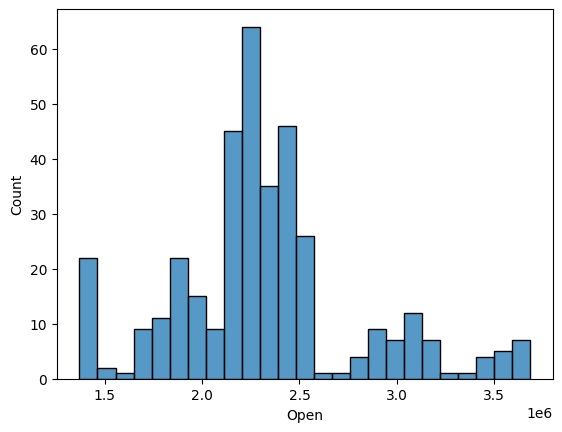

In [28]:
sns.histplot(df.Open)

<Axes: xlabel='Close', ylabel='Density'>

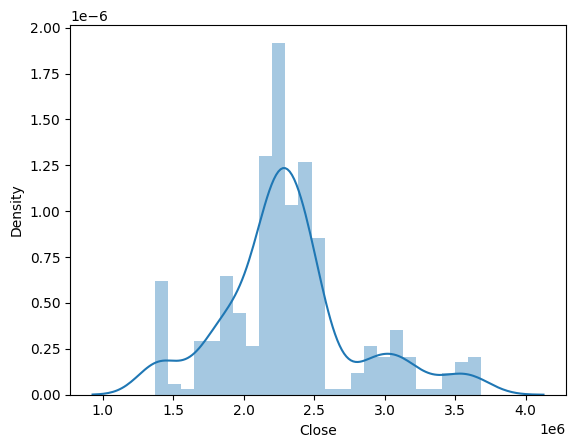

In [29]:
sns.distplot(df.Close)

<Axes: xlabel='Open', ylabel='Density'>

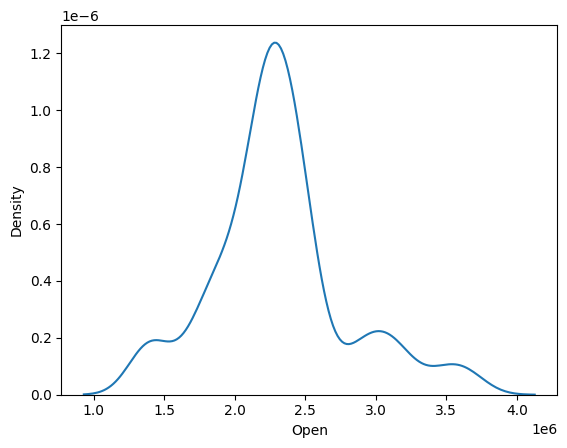

In [30]:
sns.kdeplot(df.Open)

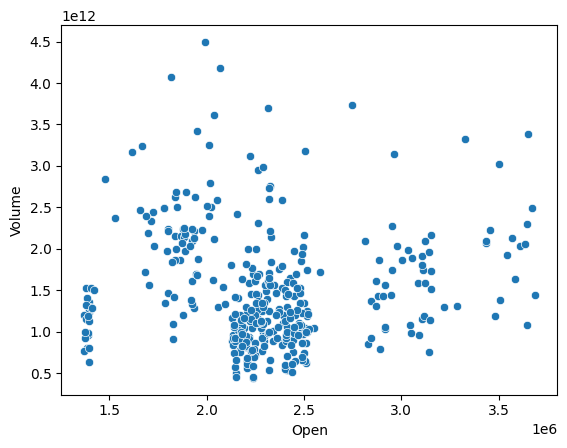

In [31]:
sns.scatterplot(x='Open',y='Volume',data=df)
plt.show()

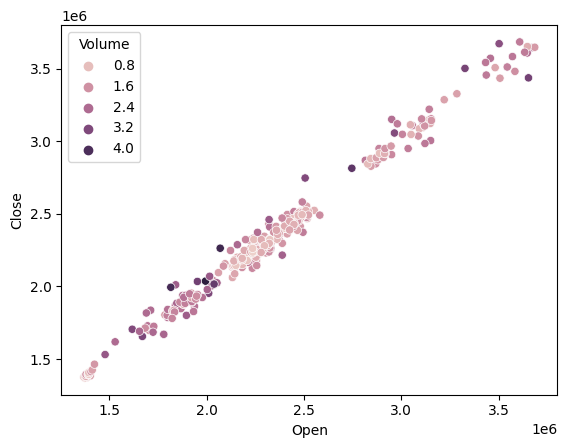

In [32]:
sns.scatterplot(x='Open',y='Close',data=df,hue='Volume')
plt.show()

<Axes: xlabel='Open', ylabel='Close'>

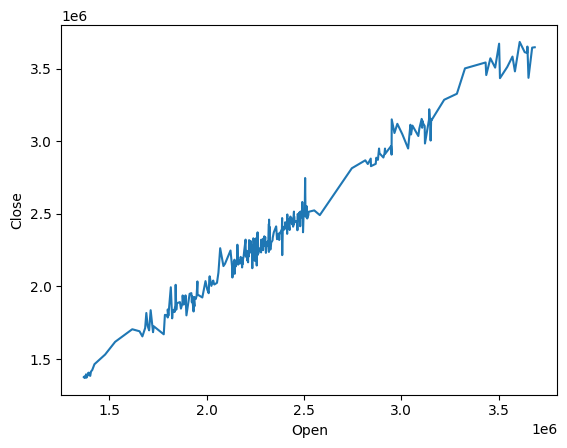

In [33]:
sns.lineplot(x='Open',y='Close',data=df)

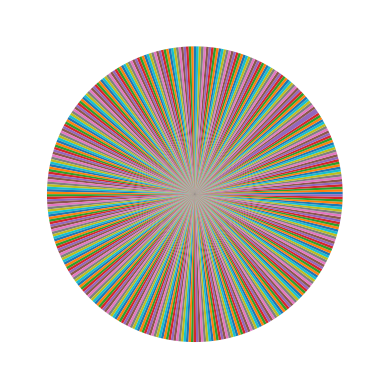

In [34]:
e=df.groupby('Open')['Open'].count()
plt.pie(e)
plt.show()

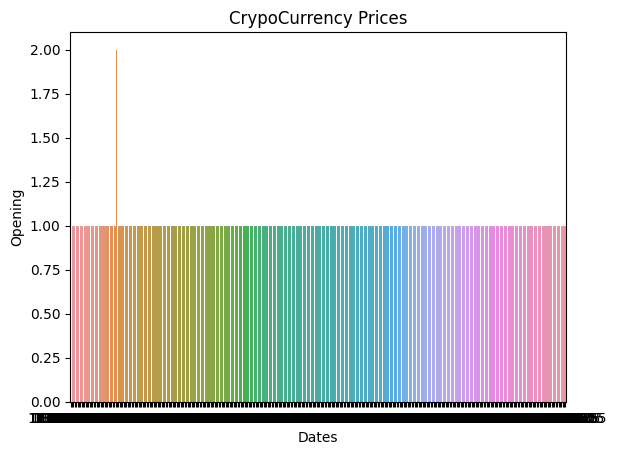

In [35]:
c=df.groupby('Open')['Open'].count()
sns.barplot(x=c.index, y=c.values)
plt.title('CrypoCurrency Prices')
plt.xlabel('Dates')
plt.ylabel('Opening')
plt.show()

<Axes: xlabel='Close'>

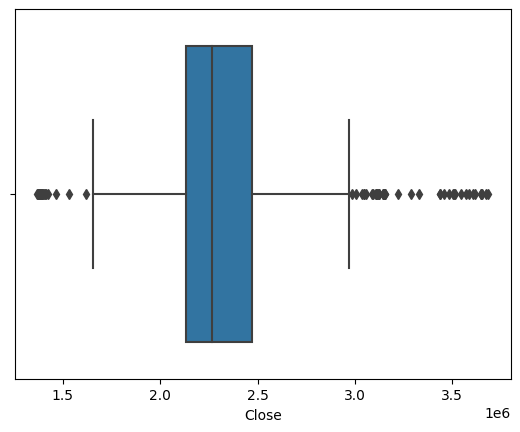

In [36]:
sns.boxplot(df.Close)

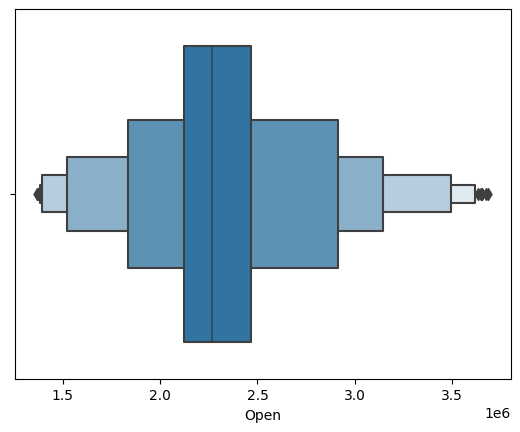

In [37]:
sns.boxenplot(df.Open)
plt.show()

<Axes: xlabel='Open'>

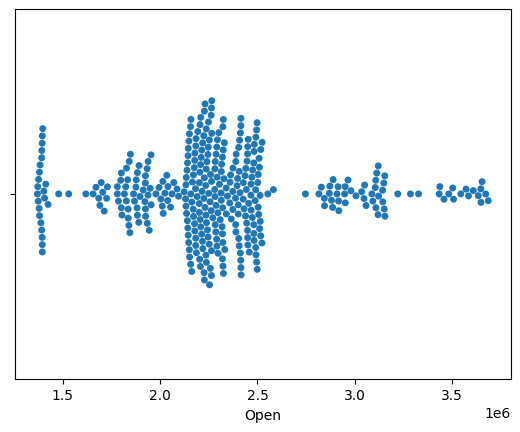

In [38]:
sns.swarmplot(df.Open)

# TIME SERIES - AUTOREGRESSION

In [39]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [40]:
df.index = df.index.tz_localize("UTC").tz_convert("Asia/Kolkata")

In [41]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-21 05:30:00+05:30,1396942.000,1397956.125,1388138.500,1393817.875,1393817.875,1233481340162
2022-12-22 05:30:00+05:30,1393888.000,1395520.000,1377057.625,1394817.000,1394817.000,1362597734113
2022-12-23 05:30:00+05:30,1394759.125,1400530.250,1391846.625,1387501.375,1387501.375,1266263988861
2022-12-24 05:30:00+05:30,1387503.375,1393097.875,1387218.500,1391697.875,1391697.875,804949340386
2022-12-25 05:30:00+05:30,1391677.250,1392755.125,1384056.750,1392458.125,1392458.125,963723627772


In [42]:
y=df.drop(columns=['Adj Close','High','Low','Close','Volume'])
y

,Open
Date,
2022-12-21 05:30:00+05:30,1396942.000
2022-12-22 05:30:00+05:30,1393888.000
2022-12-23 05:30:00+05:30,1394759.125
2022-12-24 05:30:00+05:30,1387503.375
2022-12-25 05:30:00+05:30,1391677.250
...,...
2023-12-17 05:30:00+05:30,3482587.500
2023-12-18 05:30:00+05:30,3507364.500
2023-12-19 05:30:00+05:30,3433632.250


In [43]:
y = df["Close"].resample("1D").mean().fillna(method='ffill')
y

Date
2022-12-21 00:00:00+05:30    1393817.875
2022-12-22 00:00:00+05:30    1394817.000
2022-12-23 00:00:00+05:30    1387501.375
2022-12-24 00:00:00+05:30    1391697.875
2022-12-25 00:00:00+05:30    1392458.125
                                ...     
2023-12-17 00:00:00+05:30    3507697.750
2023-12-18 00:00:00+05:30    3434999.500
2023-12-19 00:00:00+05:30    3543232.500
2023-12-20 00:00:00+05:30    3512167.000
2023-12-21 00:00:00+05:30    3613996.250
Freq: D, Name: Close, Length: 366, dtype: float64

ACF and PACF for determining the number of plots

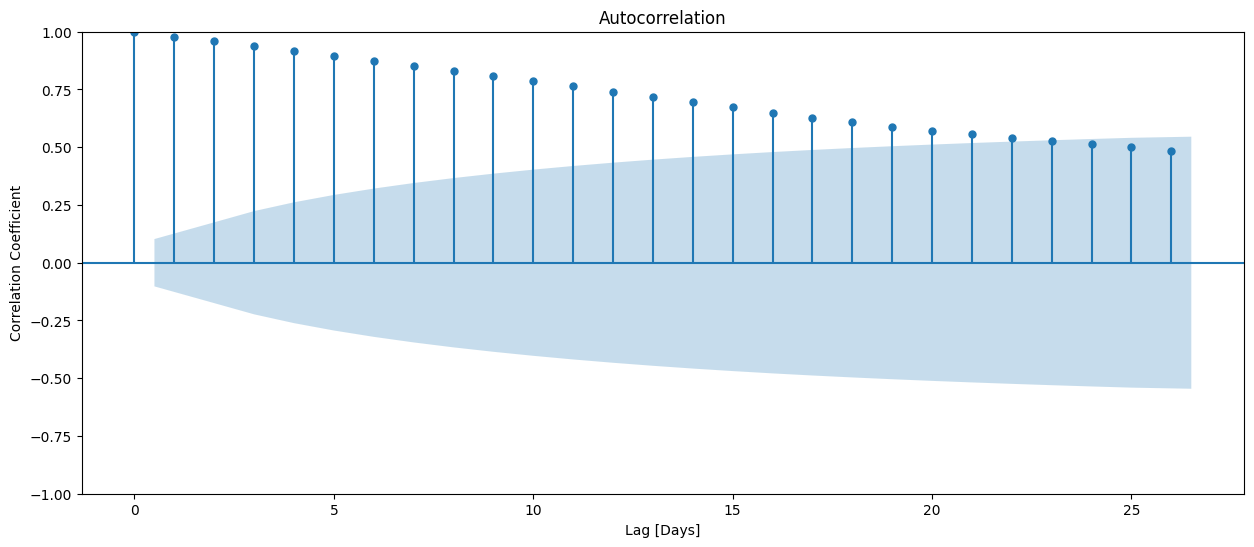

In [44]:
fig, ax = plt.subplots(figsize=(15, 6))  #predictive power
plot_acf(y,ax=ax)
plt.xlabel("Lag [Days]")
plt.ylabel("Correlation Coefficient");

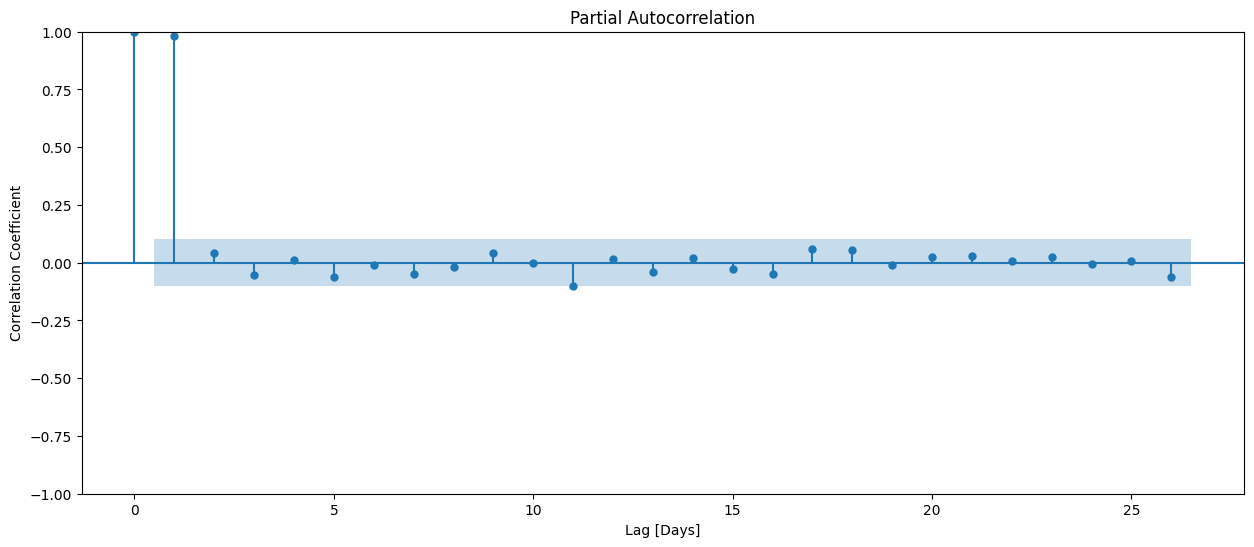

In [45]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(y,ax=ax)
plt.xlabel("Lag [Days]")
plt.ylabel("Correlation Coefficient");

Split

In [46]:
cutoff_test = int(len(y)*0.95)

y_train = y.iloc[:cutoff_test]
y_test = y.iloc[cutoff_test:]

In [47]:
y_train_mean = y_train.mean()
y_pred_baseline = [y_train_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
mae_baseline

283241.60160577693

AR Model

In [48]:
model = AutoReg(y_train,lags=3).fit()

In [49]:
y_pred=model.predict().dropna() # will remove the first 3 since it cannot be predicted 
y_pred

Date
2022-12-24 00:00:00+05:30    1.399088e+06
2022-12-25 00:00:00+05:30    1.401864e+06
2022-12-26 00:00:00+05:30    1.403874e+06
2022-12-27 00:00:00+05:30    1.413221e+06
2022-12-28 00:00:00+05:30    1.396854e+06
                                 ...     
2023-11-28 00:00:00+05:30    3.123851e+06
2023-11-29 00:00:00+05:30    3.103314e+06
2023-11-30 00:00:00+05:30    3.149120e+06
2023-12-01 00:00:00+05:30    3.158163e+06
2023-12-02 00:00:00+05:30    3.143084e+06
Freq: D, Length: 344, dtype: float64

In [50]:
y_pred.isnull().sum()

0

In [51]:
training_mae = mean_absolute_error(y_train.iloc[3:],y_pred)
training_mae

33596.282409867265

Residuals

In [52]:
y_train_resid=model.resid  # actual - predicted 
y_train_resid

Date
2022-12-24 00:00:00+05:30    -7390.249015
2022-12-25 00:00:00+05:30    -9406.131496
2022-12-26 00:00:00+05:30    -1168.354584
2022-12-27 00:00:00+05:30   -29464.247369
2022-12-28 00:00:00+05:30   -25431.977701
                                 ...     
2023-11-28 00:00:00+05:30   -18241.082023
2023-11-29 00:00:00+05:30    51127.057037
2023-11-30 00:00:00+05:30     5630.221550
2023-12-01 00:00:00+05:30   -14683.183597
2023-12-02 00:00:00+05:30    77779.758359
Freq: D, Length: 344, dtype: float64

<Axes: xlabel='Date', ylabel='Residuals'>

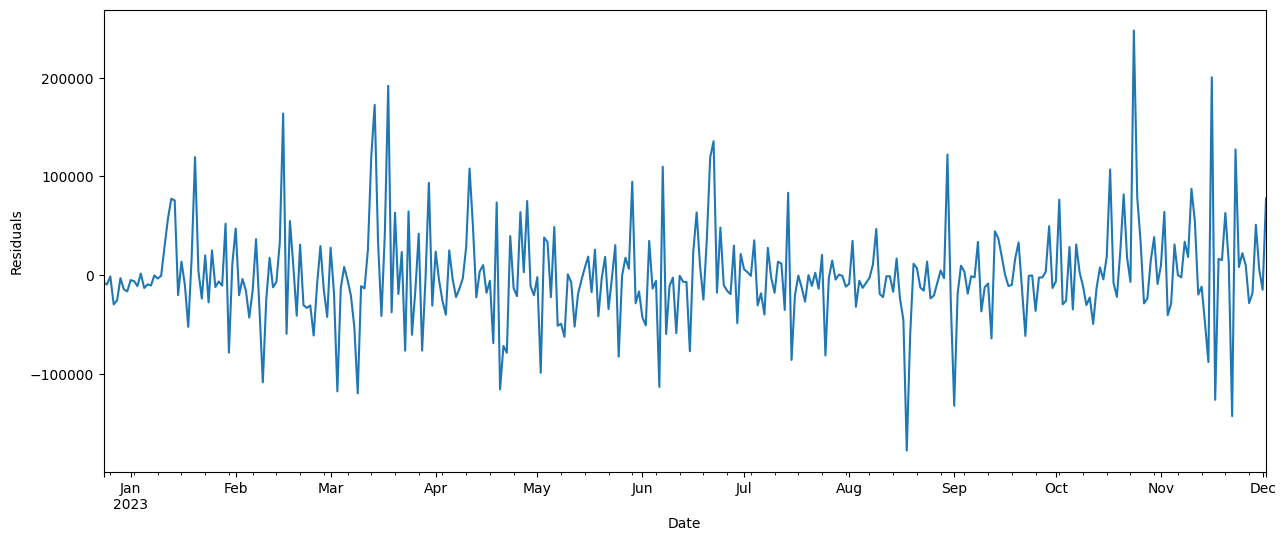

In [53]:
#residuals must be normally distributed
fig,ax = plt.subplots(figsize=(15, 6))
y_train_resid.plot(ylabel="Residuals",ax=ax)

Text(0.5, 1.0, 'Distribution of Residuals')

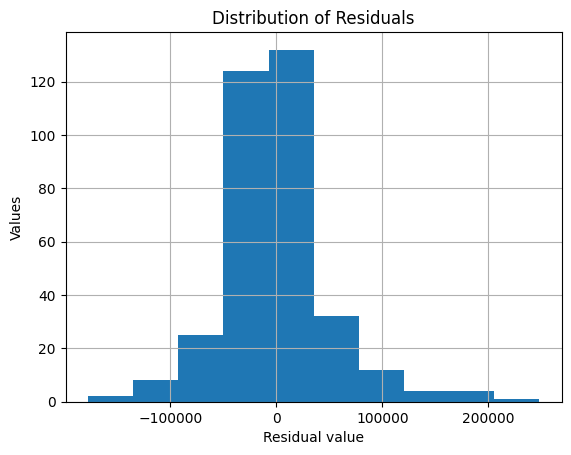

In [54]:
y_train_resid.hist()
plt.xlabel("Residual value")
plt.ylabel("Values")
plt.title("Distribution of Residuals")

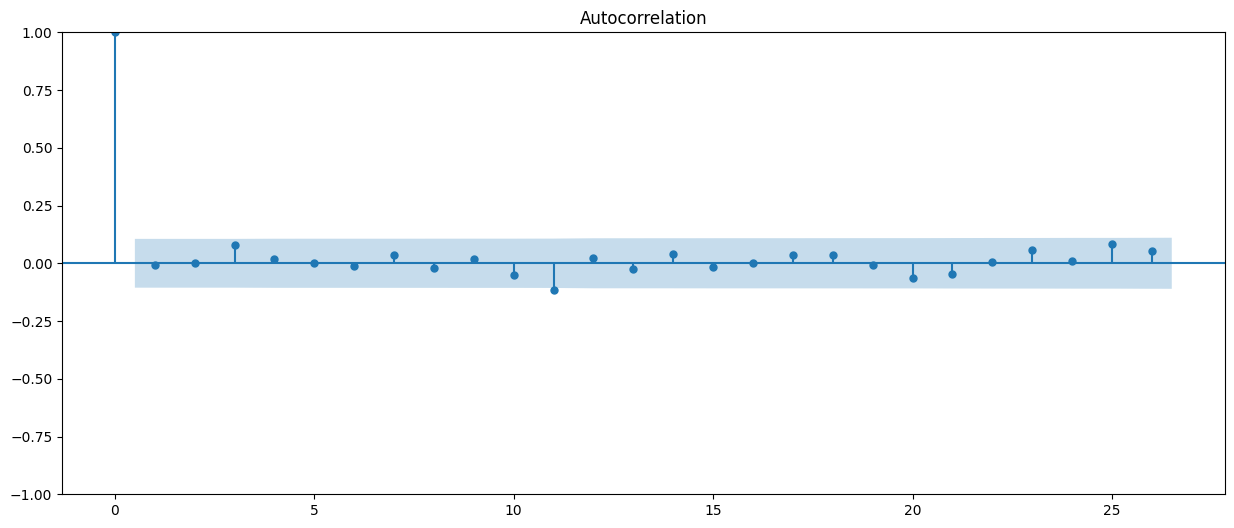

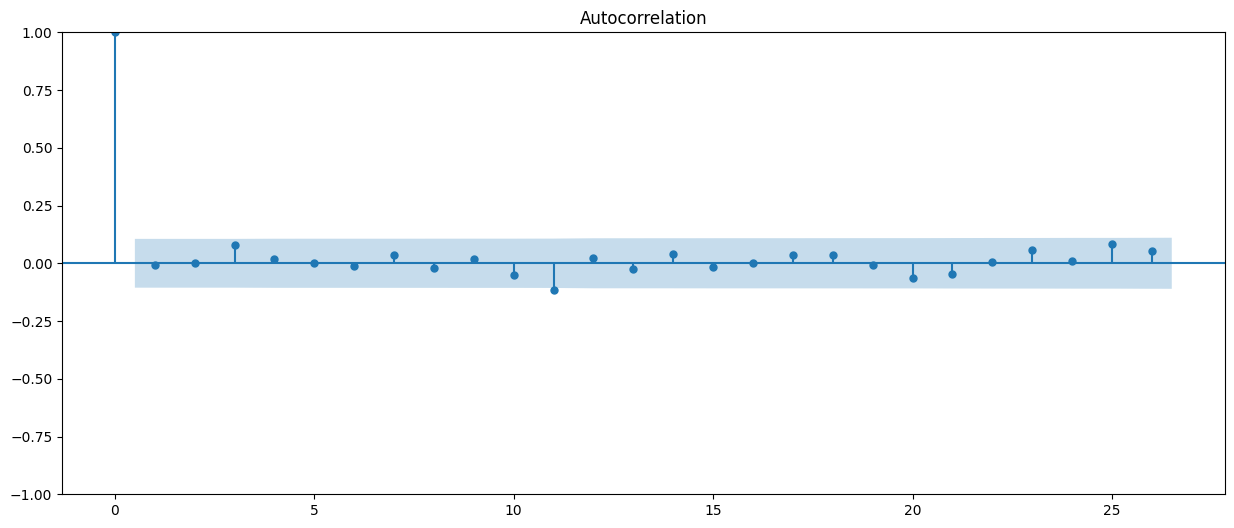

In [55]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(y_train_resid,ax=ax)

In [56]:
y_pred_test = model.predict(y_test.index.min(),y_test.index.max())
test_mae = mean_absolute_error(y_test,y_pred_test)
print("Test MAE:", test_mae)

Test MAE: 328400.2700716642


Walkforward Validation

In [57]:
%%capture

y_pred_wfv = pd.Series()  #for test data --> predicted is again used for training
history = y_train.copy()
for i in range(len(y_test)):
    model=AutoReg(history,lags=3).fit()
    next_pred=model.forecast()
    y_pred_wfv=y_pred_wfv.append(next_pred)
    history=history.append(y_test[next_pred.index])

In [58]:
test_mae = mean_absolute_error(y_test,y_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))

Test MAE (walk forward validation): 78418.65


# ARIMA Model

In [59]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

In [60]:
data=pd.read_csv("BTC-INR.csv")

In [61]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.index = data.index.tz_localize("UTC").tz_convert("Asia/Kolkata")

<Axes: xlabel='Date'>

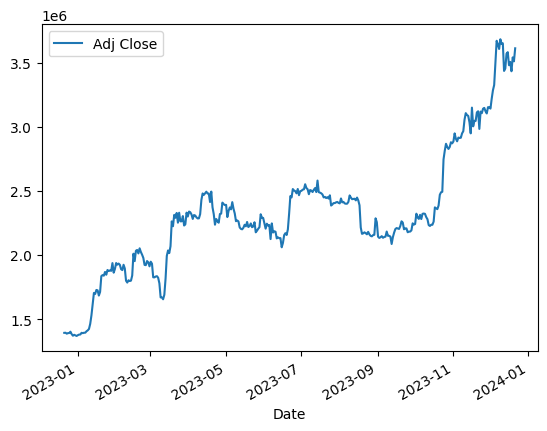

In [62]:
data.plot(y='Adj Close')

In [63]:
data.tail(5)
data=data.drop(columns=['Open','High','Low',"Close",'Volume'])

In [64]:
data

,Adj Close
Date,
2022-12-21 05:30:00+05:30,1393817.875
2022-12-22 05:30:00+05:30,1394817.000
2022-12-23 05:30:00+05:30,1387501.375
2022-12-24 05:30:00+05:30,1391697.875
2022-12-25 05:30:00+05:30,1392458.125
...,...
2023-12-17 05:30:00+05:30,3507697.750
2023-12-18 05:30:00+05:30,3434999.500
2023-12-19 05:30:00+05:30,3543232.500


In [65]:
cutoff_test = int(len(data) * 0.95)
y_train = data.loc['2022-12-21':'2023-10-31']
y_test = data.loc['2023-11-01':]
y_test_actual = y_test['Adj Close'].copy()

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [67]:
p_widget = widgets.IntSlider(min=0, max=25, step=2, value=8, description='p:')
q_widget = widgets.IntSlider(min=0, max=3, step=1, value=1, description='q:')
plot_button = widgets.Button(description="Plot Prediction")

IntSlider(value=8, description='p:', max=25, step=2)

IntSlider(value=1, description='q:', max=3)

Button(description='Plot Prediction', style=ButtonStyle())

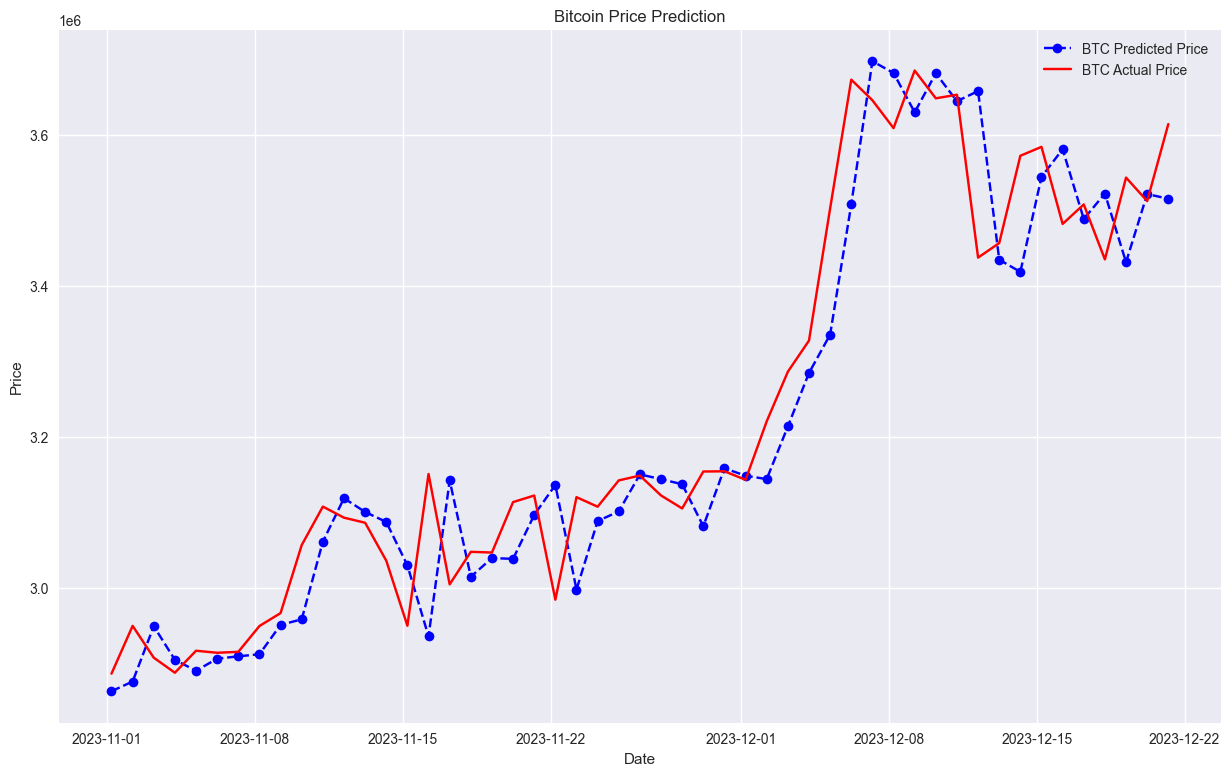

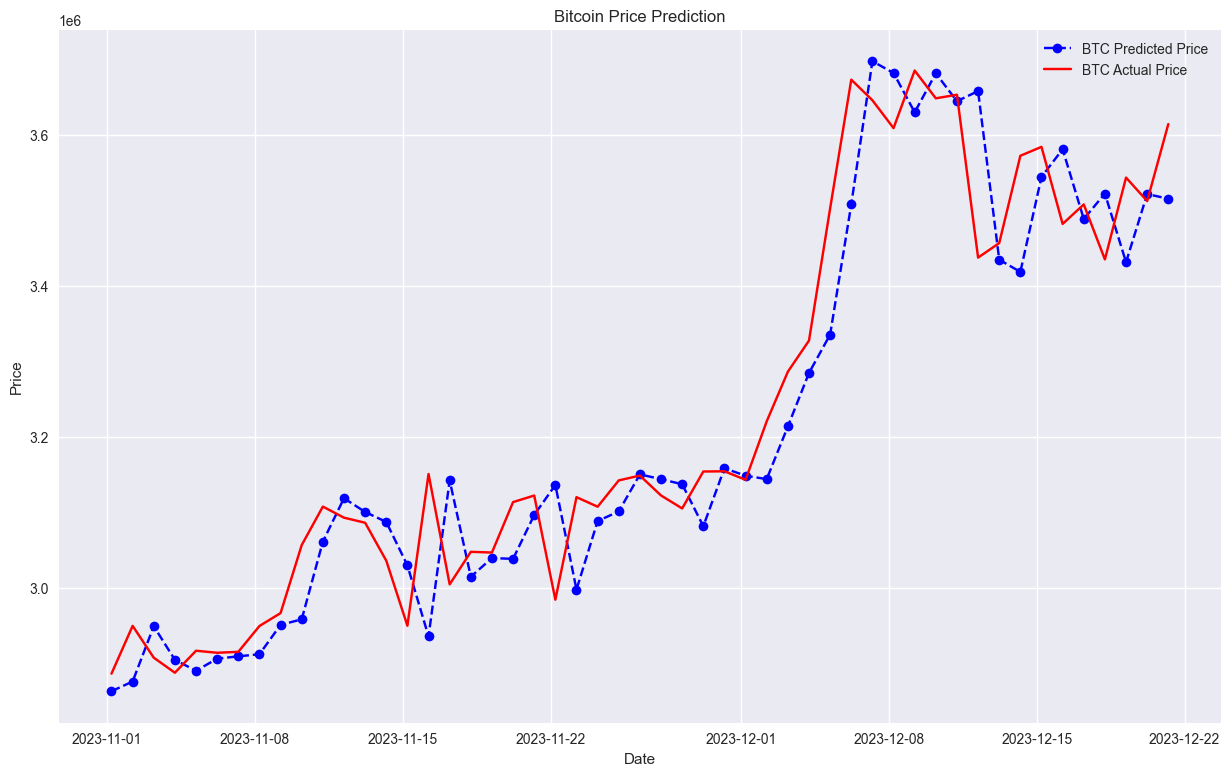

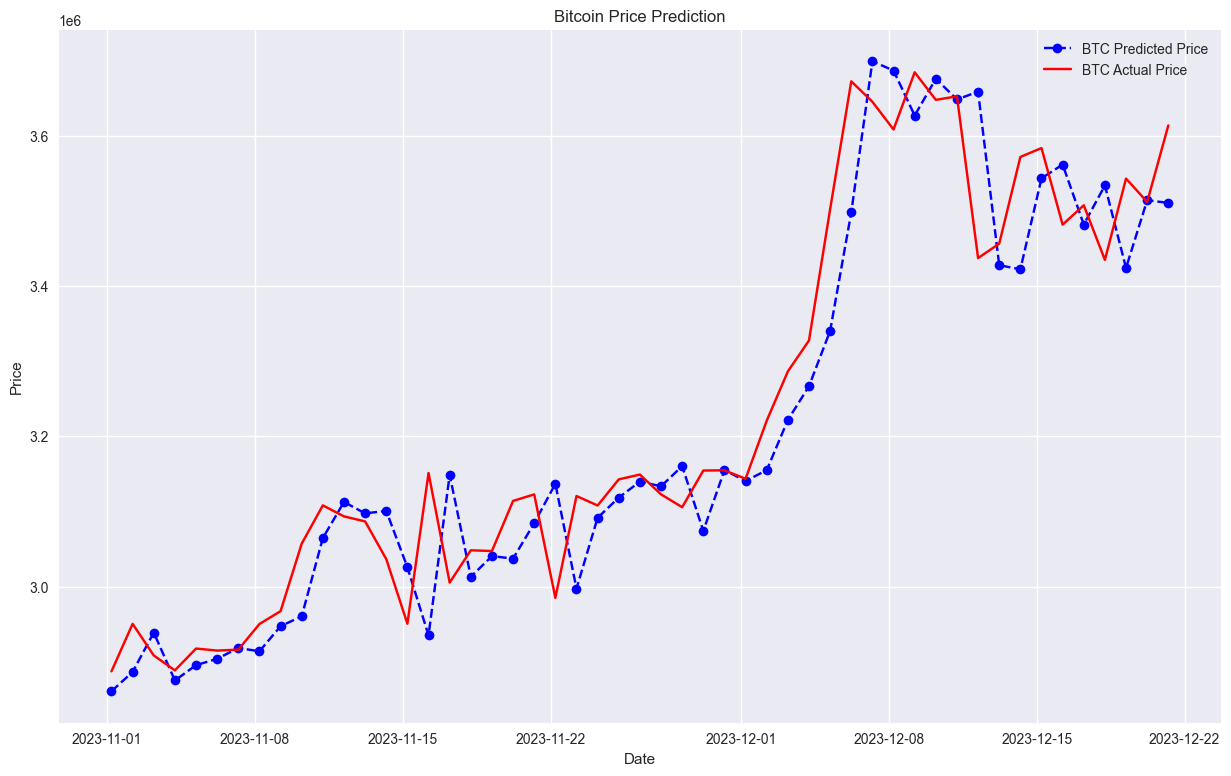

In [68]:
def plot_prediction(b):
    y_pred_wfv = pd.Series(name='series')
    history = y_train['Adj Close'].copy()

    for i in range(len(y_test)):
        model = ARIMA(history, order=(p_widget.value, 0, q_widget.value)).fit() 
        next_pred = model.forecast(steps=1) 
        next_pred_series = pd.Series(next_pred, index=[y_test.index[i]])
        next_pred_series.name = 'series'
        y_pred_wfv = y_pred_wfv.append(next_pred_series)
        history = history.append(pd.Series(y_test_actual.iloc[i], index=[y_test.index[i]]))  

    date_range = y_test.index
    model_predictions = y_pred_wfv.values
    testing_data = y_test_actual.values

    with plt.style.context('seaborn'):
        plt.figure(figsize=(15, 9))
        plt.grid(True)

        plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label='BTC Predicted Price')
        plt.plot(date_range, testing_data, color='red', label='BTC Actual Price')

        plt.title('Bitcoin Price Prediction')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.legend()
        plt.show()
        
plot_button.on_click(plot_prediction)
p_widget.observe(plot_prediction, names='value')
q_widget.observe(plot_prediction, names='value')
display(p_widget)
display(q_widget)
display(plot_button)

In [70]:
p=3
q=1
model = ARIMA(history, order=(p,0,q)).fit() #p-->lag, d-->difference q-->moving average
next_day_forecast = model.forecast(steps=1)
print("Forecasted value for the next day:", next_day_forecast)

Forecasted value for the next day: 2023-12-22 00:00:00+05:30    3.608033e+06
Freq: D, dtype: float64


In [76]:
# mae_df = pd.DataFrame(mae_grid)
# mae_df.round(4)

In [ ]:
sns.heatmap(mae_df, cmap="Blues")
plt.xlabel("p values")
plt.ylabel("q values")
plt.title("ARIMA Grid search")

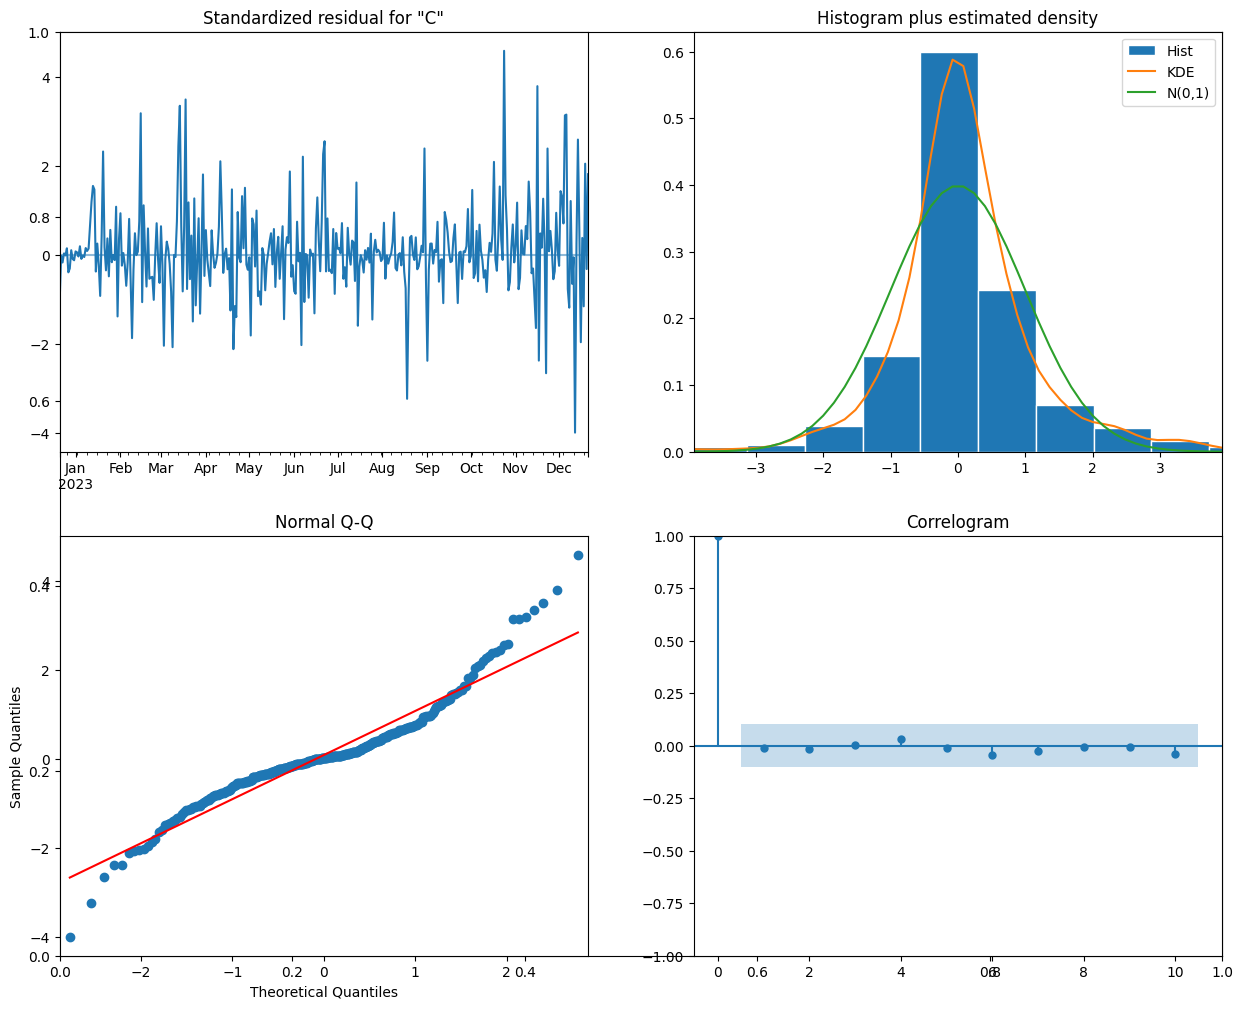

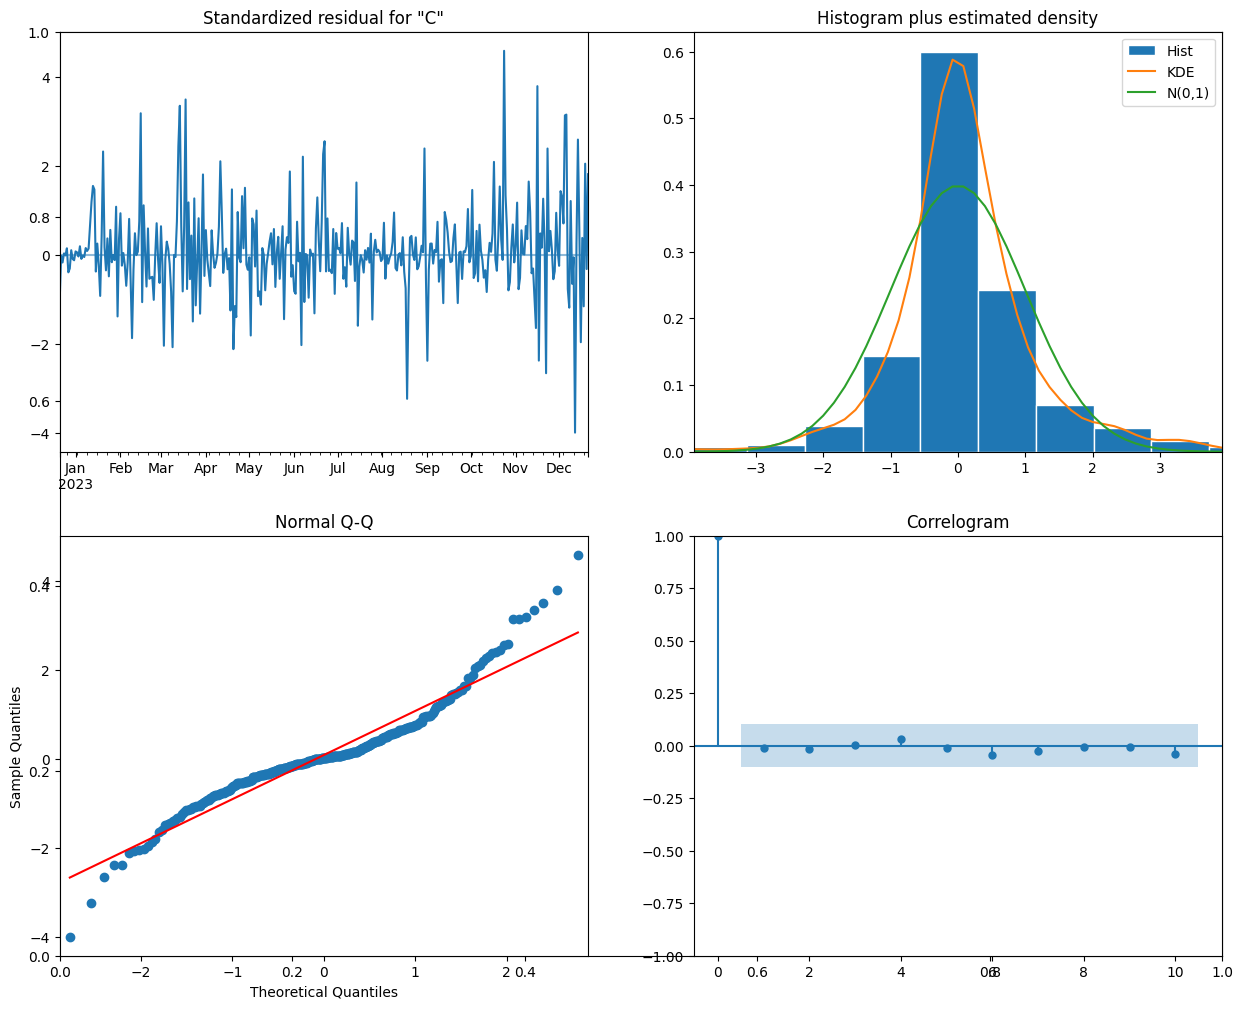

In [72]:
fig, ax = plt.subplots(figsize=(15, 12))
model.plot_diagnostics(fig=fig)

Evaluation

In [73]:
y_pred_wfv = pd.Series(name='series')
history = y_train['Adj Close'].copy() 

for i in range(len(y_test)):
    model = ARIMA(history, order=(8, 0, 1)).fit()
    next_pred = model.forecast()
    next_pred_series = pd.Series(next_pred, index=[y_test.index[i]])
    next_pred_series.name = 'series'  
    y_pred_wfv = y_pred_wfv.append(next_pred_series)
    history = history.append(next_pred_series)


In [74]:
mae_test = mean_absolute_error(y_test, y_pred_wfv)
print(f"MAE on test set: {mae_test}")

MAE on test set: 495704.8321383063


In [75]:
v=model.forecast()
v

2023-12-21 05:30:00+05:30    2.614747e+06
Freq: D, dtype: float64